# Algerian Forest Fire EDA Practical Implementation

Submitted By - Ambarish Singh

## Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## 1) Problem statement.

* The dataset Comprises of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

* If User can Predict that Algerian Forest will Catch Fire or Not based on Input Features.

* Prediction result can be used for Forest Fire Situation Tackers & Make Correct Preventions to Avoid it in future.


## 2) Data Collection.

* The Dataset is collected from Website named, UCI Machine Learning Repository.
* The data consists of 15 columns and 244 rows.

In [1]:
#comment
#observations

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

## 2.1 Import Data and Required Packages

In [1]:
# Importing required libraries for EDA
# The main aim is to understand data in better way

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Loading CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header = 1)


**Show Top 5 Records**

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# 3) DATA Cleaning

**Removing Unnecessary Rows From Dataset**

In [4]:
## Removing Unnecessary Rows From Dataset

df.drop(index=[122,123], inplace=True) 
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

**Adding New Feature, named 'Region' in a Dataset**

In [5]:
## Adding New Feature, named 'Region' in a Dataset

df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

**Stripping the names of the columns**

In [6]:
# Stripping the names of the columns

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

**Stripping the Classes Features data**

In [7]:
# Stripping the Classes Features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


# Changing The DataTypes of the Columns

In [9]:
# Changing The DataTypes of the Columns

df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


**Adding New Feature,named 'Date' by Replacing Unnecessary feature like 'day','month','year'**

In [10]:
## Adding New Feature,named 'Date' by Replacing Unnecessary feature like 'day','month','year'.

df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [11]:
## Showing Updated Dataset after Modification Done.
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


# 4) EXPLORING DATA

## 4.1) Profile of the Data

**Shape of the dataset**

In [12]:
# getting shape and size
df.shape


(244, 13)

**Observation :-**

* In this Dataset there are 13 Columns & 244 Rows

**Columns of the Dataset**

In [13]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

**Check Missing Value in Dataset**

In [14]:
## Check if Missing Value Present or Not in Dataset.
df.isnull().sum()


Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

**Observations:-**
    
* We Got one NUll Value in 'Classes' Feature 

In [15]:
## Unique Value of Classes feature

df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

**Handling Categorical Feature Classes**

In [58]:
## Handling Categorical Feature Classes

df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia,2012-06-02
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,bejaia,2012-06-03
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0,bejaia,2012-06-04
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,bejaia,2012-06-05


**Focus on Replacing Null Value**

In [17]:
# Focus on Replacing Null Value
# The best Way of Replacing Null Value by using mode

df['Classes'].mode() [0]    

1.0

In [18]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [19]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

**Observations**

* Now We have Zero Null Value in dataset

In [42]:
df['Classes'].unique()

array([0, 1], dtype=int64)

**Check Datatypes in the dataset**

In [21]:
# Check Null & getting feature datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


**Observations**

* There is total 244 rows and 13 columns.
* There are No Null Value in Dataset
* There is total 4 data types float64, int64, object and datetime64.
* Dtypes Included float64 = 7 Columns, int64 = 2 Columns, object = 3 Columns and datetime64 = 1
* Total Memory Usage is 23.0+ KB

**Checking the usage of the memory by the dataset**

In [22]:
## Checking the usage of the memory by the dataset

df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

### 4.1.1 Numerical and Categorical Columns

**Numerical Dataset**

In [23]:
# 1. Getting Numerical features from dataset 
# 2. Creating Numerical dataframe
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# Print Numerical Features
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))


We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


**Categorical Dataset**

In [24]:
# 1. Getting Categorical features from dataset 
# 2. Creating Categorical dataframe
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('\n We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


 We have 3 categorical features : ['DC', 'FWI', 'region']


# 4.1.2 Feature Information

In [59]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,bejaia,2012-06-01
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,bejaia,2012-06-02



**Weather data observations:-**
* Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8

**FWI Components**
* (FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5
* (DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9
* (DC) Drought Code index from the FWI system: 7 to 220.4
* (ISI) Initial Spread Index  from the FWI system: 0 to 18.5
* (BUI) Buildup Index from the FWI system: 1.1 to 68
*  (FWI) Fire Weather Index: 0 to 31.1

* Classes: two classes, namely Fire and not Fire.
* Region: Two Regions, namely Bejaia Region indicated with 0 and Sidi Bel-Abbes Region indicated with 1.

**DATE Observations (DD/MM/YYYY) :-** 
* Date :-  Date Displayed in (DD/MM/YYYY) format in dataset 


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [60]:
df.var()

Temperature     13.204817
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

### Numerical Features Analysis

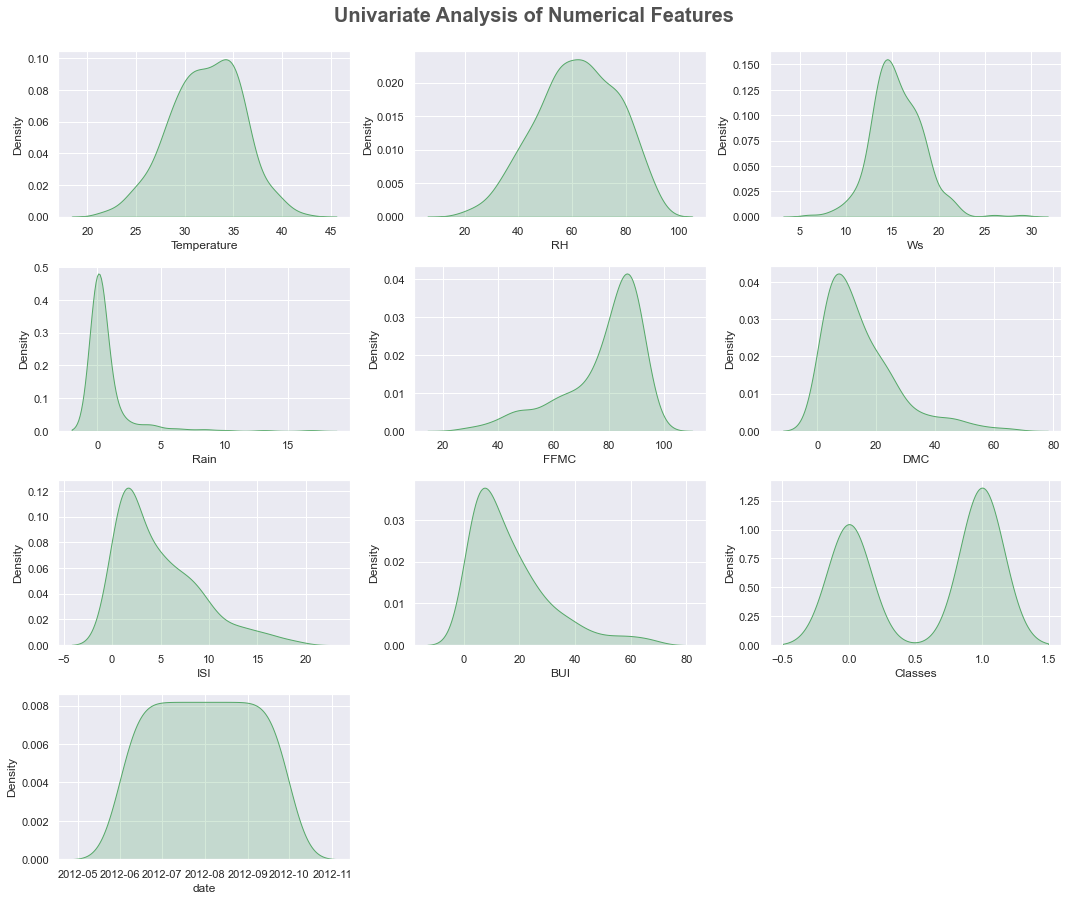

In [61]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

**Observations**

* Rain,ISI,BUI,DMC are right skewed and postively skewed.
* FFMC is a Left skewed and Negetively skewed.
* Outliers in Rain, ISI, BUI, DMC and FFMC


### Scatter plot to see the trends in each numerical column

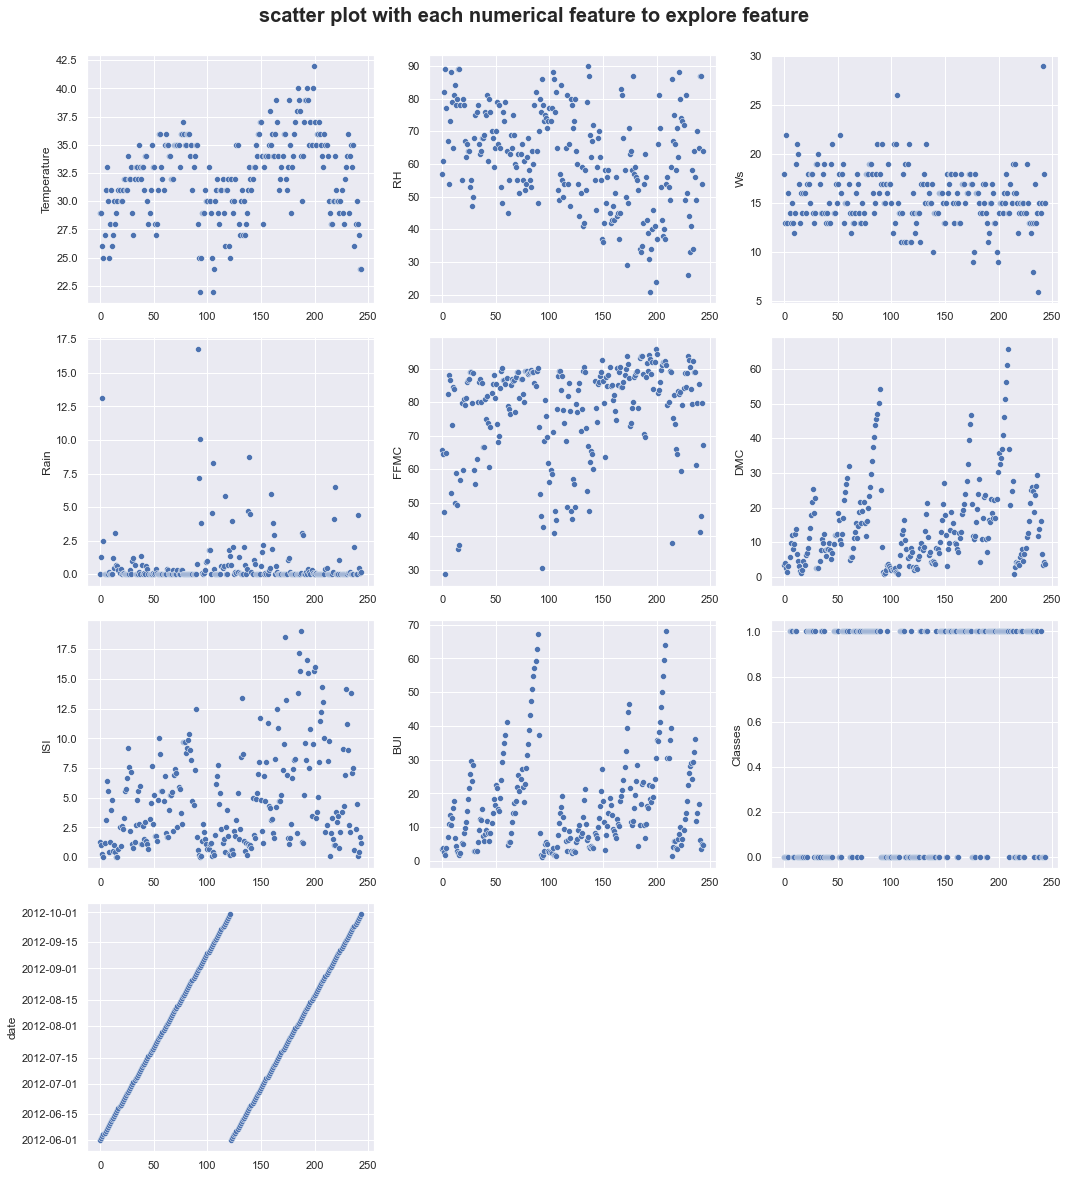

In [48]:
# scatter plot to see the trends in each numerical column

plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index, data=df)
    plt.tight_layout()

### Categorical Features Analysis 

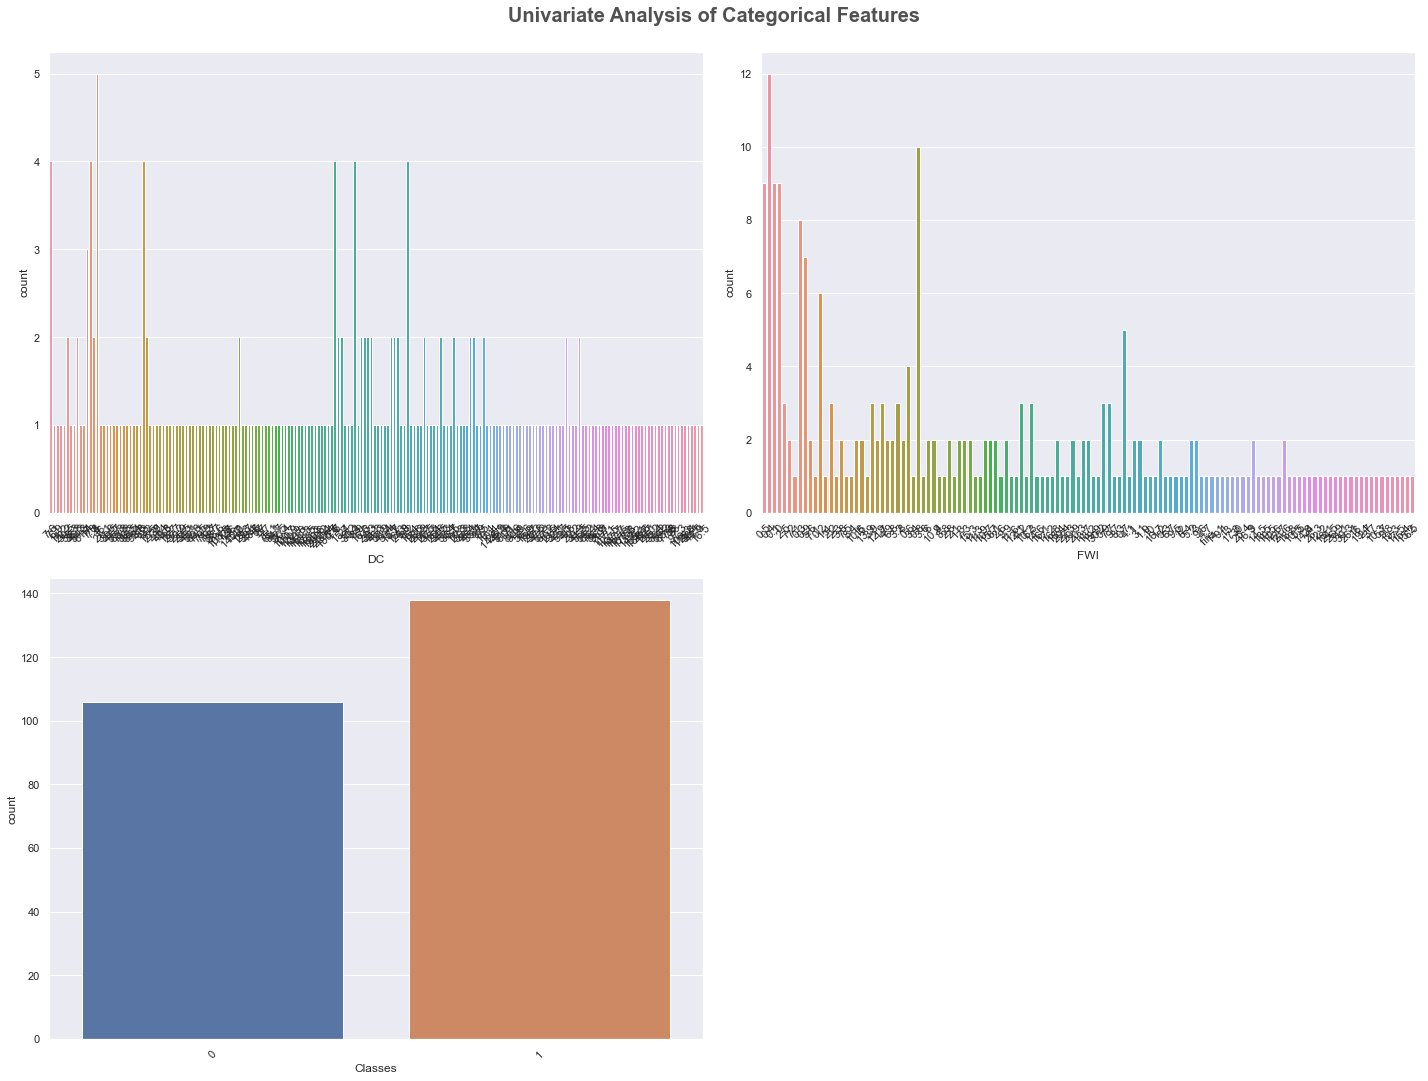

In [46]:
# categorical columns Analysis

plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['DC', 'FWI', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    

**observation -**
* Extreme value of Temperature is above 40
* Most of the time RH is above 30
* WS values lie between 10 to 20

## Bivariate analysis and multivariate analysis

In [49]:
# stripplot (categorical vs numerical)
# scatterplot / pairplot (numerical vs numerical) (check correlation)
# boxplot (outlies)
# heatmap (correlation)
# lineplot (trend in numerical feature with time)

### Multicolleniarity in numerical features

In [50]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.518119,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


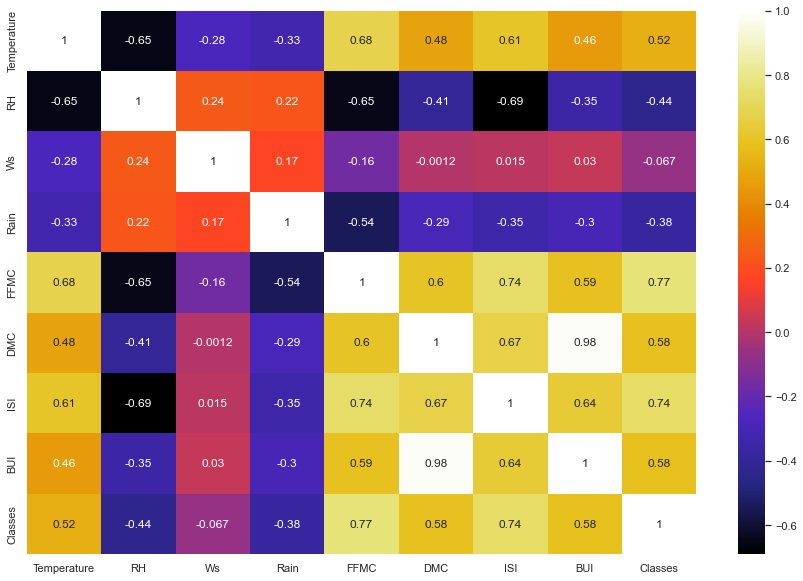

In [51]:
## Plotting Heatmap

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**observation -**
* Highly +ve correlated features are DMC and BUI
* Highly -ve correlated features are RH and Temp, RH and FFMC, RH and ISI

**strip plot to see the relationship between numerical features and target**

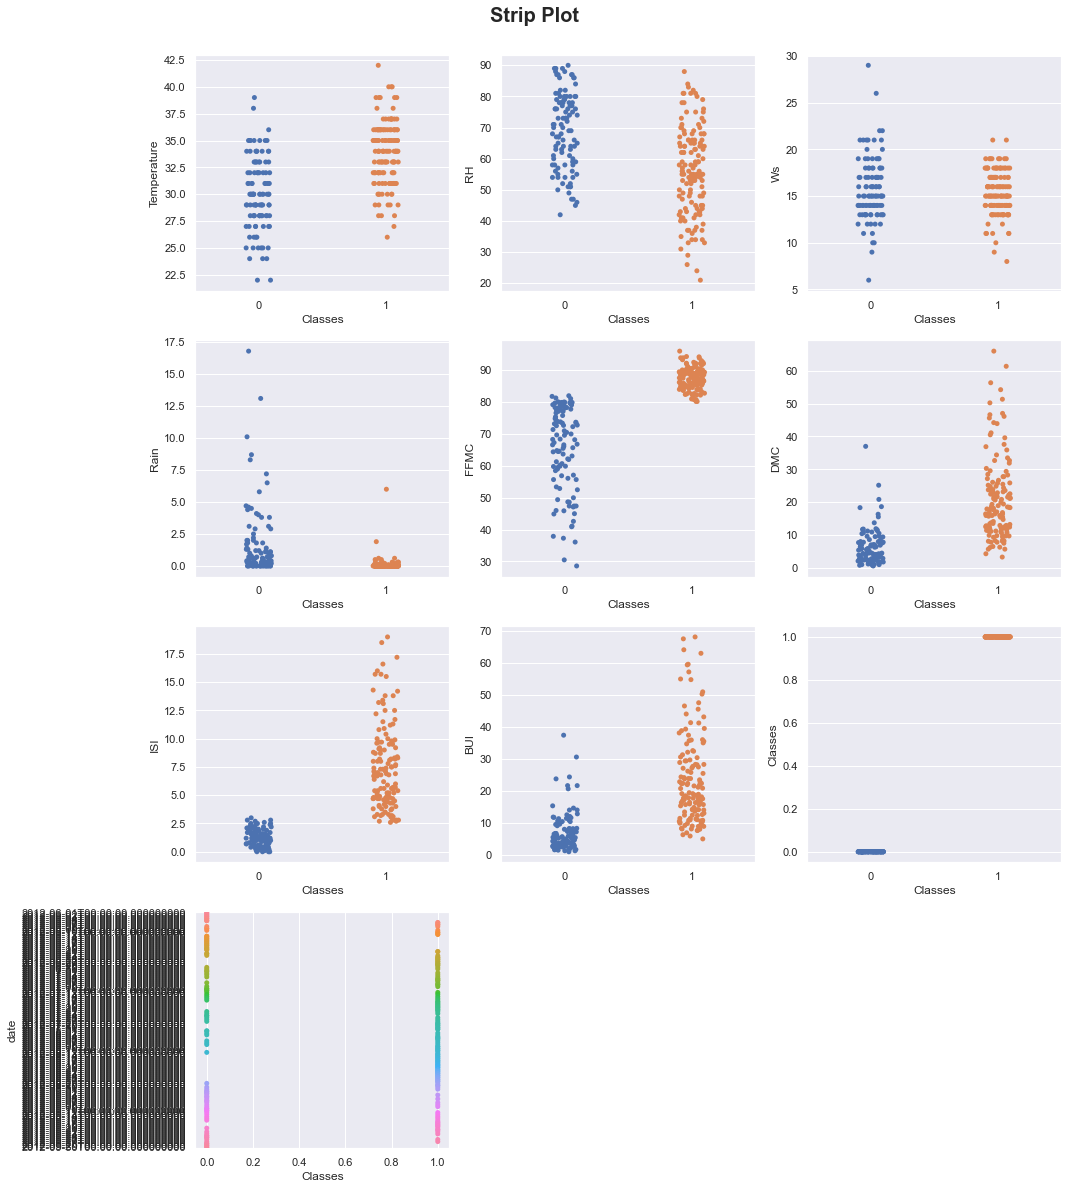

In [53]:
# strip plot to see the relationship between numerical features and target


plt.figure(figsize=(15, 20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.stripplot(y=numerical_features[i], x='Classes', data=df)
    plt.tight_layout()

**observation -**

* Note :- Here 0 = 'not Fire' and 1 = 'Fire'
    
* places with higher temperature has fire
* places with lower RH has fire
* places wiht ffmc > 80 has fire
* places wiht ISI > 2.5 has fire
* places with Rain < 2 has fire

**Boxplot to find Outliers in the features**

<AxesSubplot:>

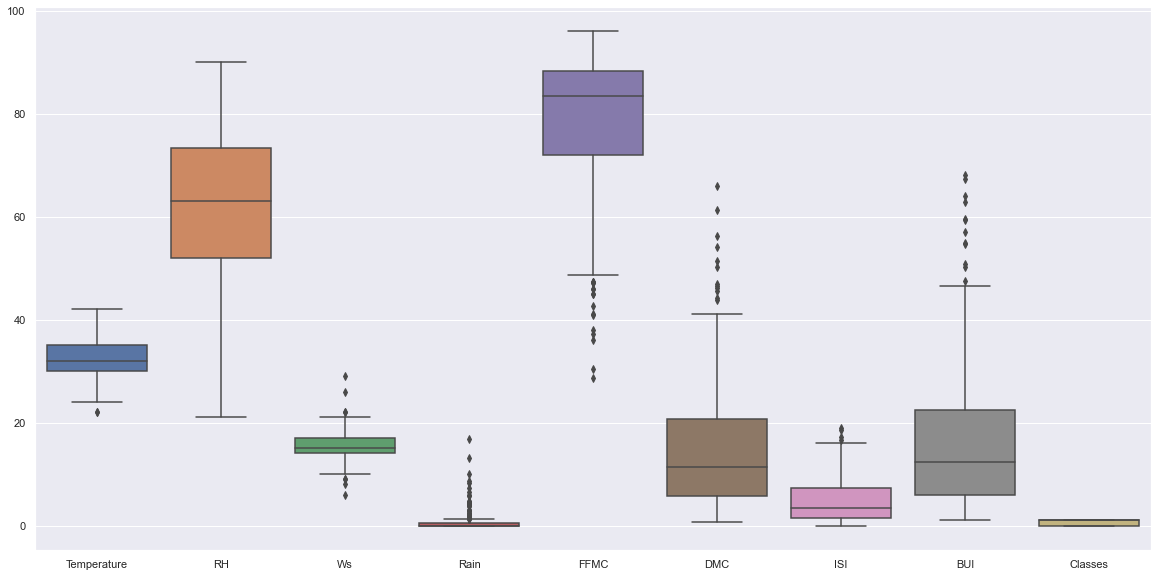

In [71]:
## Boxplot to find Outliers in the features
sns.boxplot(data = df,orient="v")


**Observation:-**
* RH, Rain, FFMC, DMC BUI has many outliers

# 4.2 ) Statistical Analysis

In [64]:
# Display summary statistics for a dataframe
df.describe()


,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


***Observation***

* df.describe() return all Statistics Summary of Numeric Columns. 
* Its Return function like:- count(), mean(), std(), min(), 25%(), 50%(), 75%(), max().

# 4.3) Graphical Analysis

## Which area has most of the time fire happen ?

<AxesSubplot:xlabel='region', ylabel='Classes'>

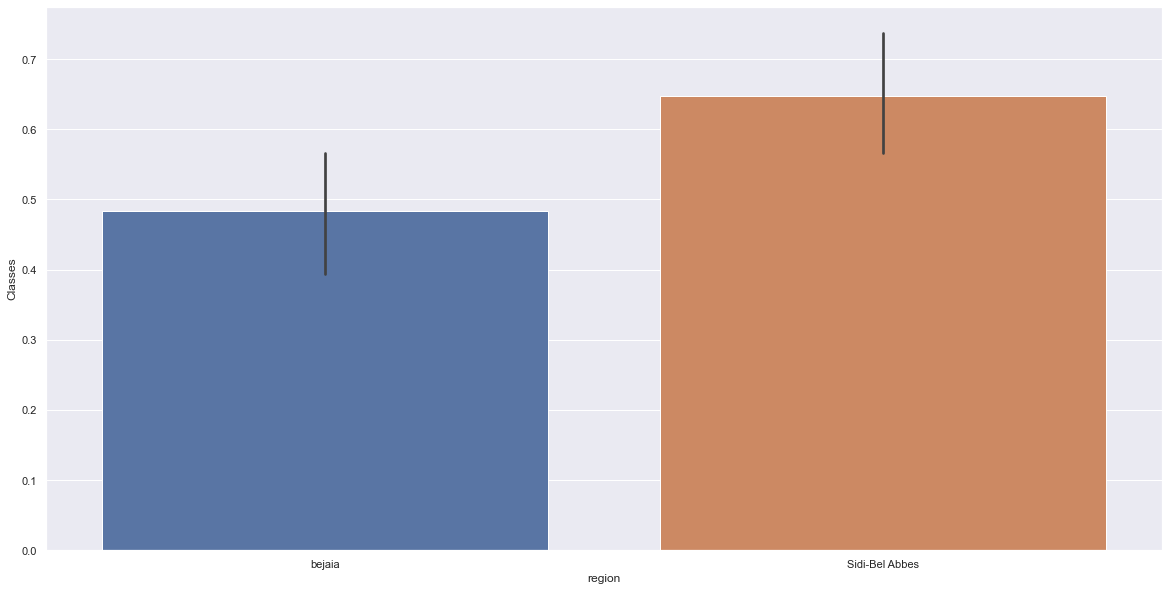

In [47]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Classes",data=df)

**Observation**

* Sidi-Bel-Abbes Region has Most of the Time Fire Took Placed.

## Temperature Range which is in most of the places ?

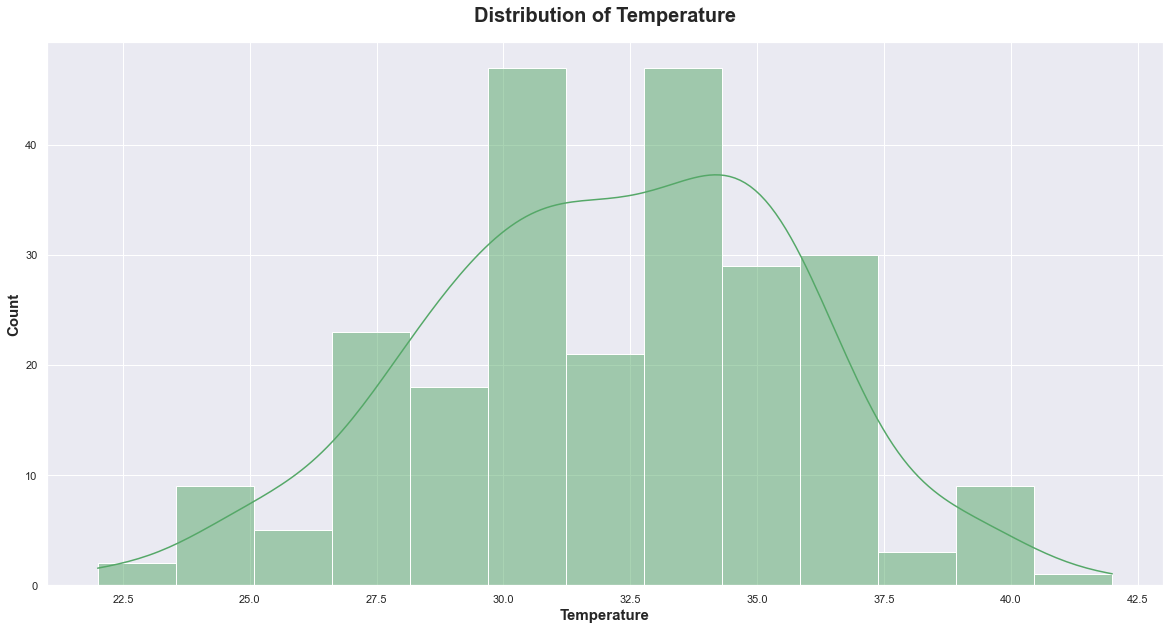

In [67]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='g',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

**Observation:-**

* Temperature occur most of the time in range 32.5 to 35.0

## Highest Temperature attained

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

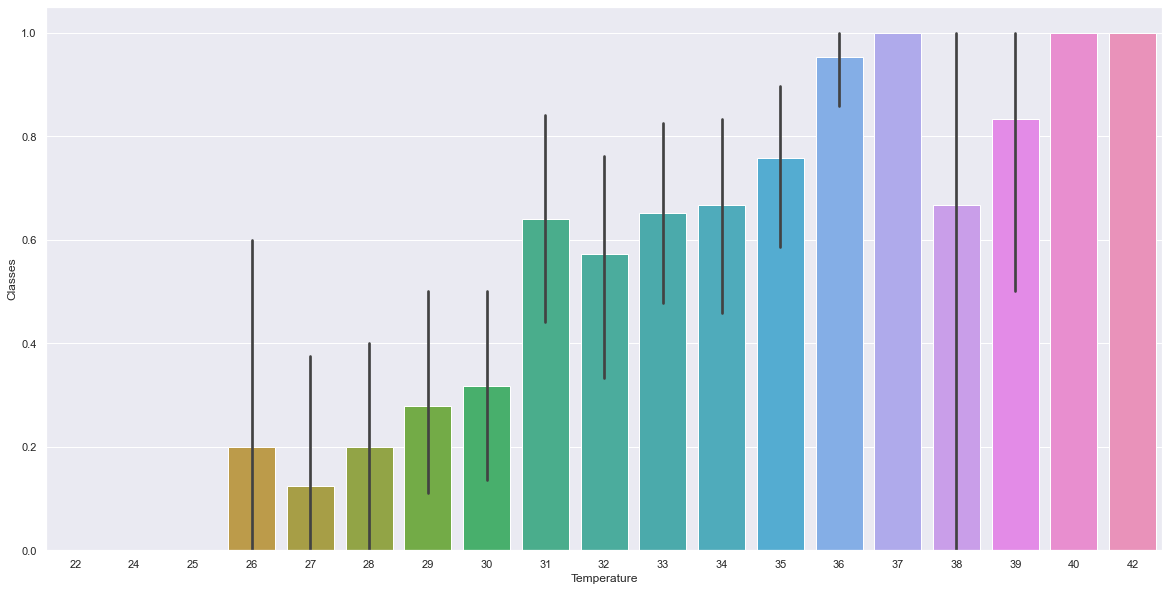

In [68]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=df)

**Observation:-**

* Highest temperature is 42,40,37

## Which region has most time rain happens

<AxesSubplot:xlabel='region', ylabel='Rain'>

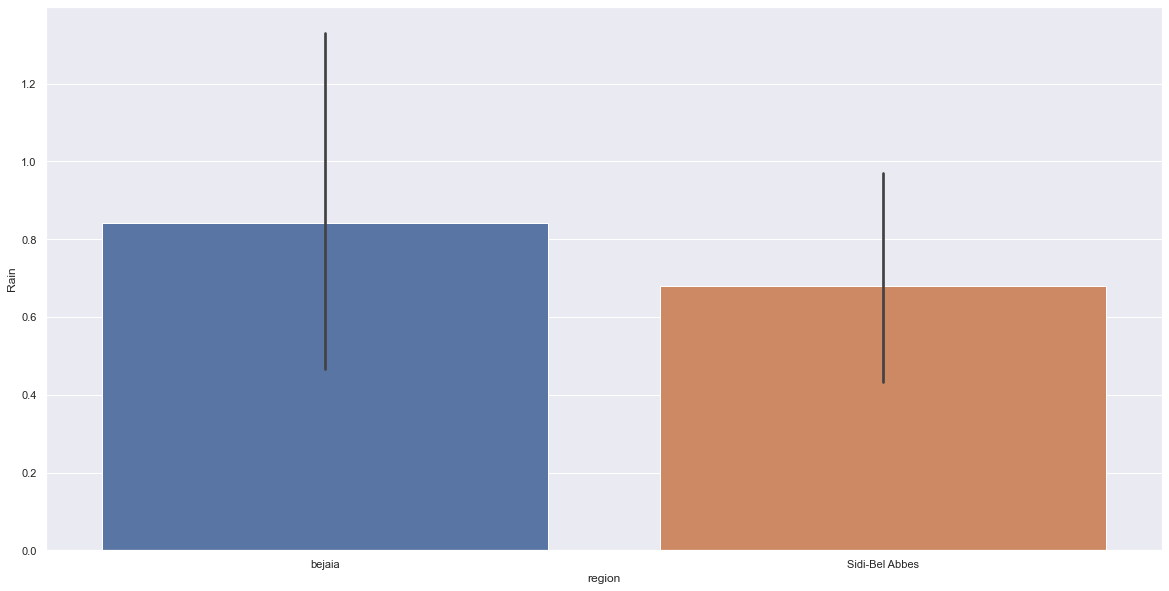

In [69]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Rain",data=df)

**Observation**

* Bejaia is the region  in which most of the time rain happens

### Boxplot to find Outliers in the features

<AxesSubplot:>

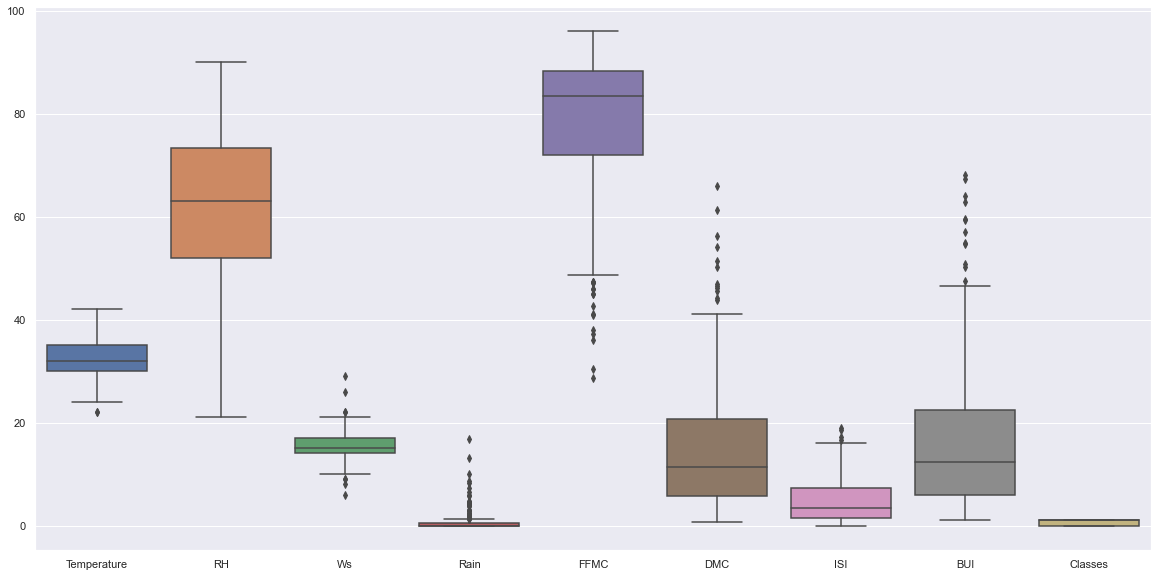

In [73]:
## Boxplot to find Outliers in the features
sns.boxplot(data = df,orient="v")


**Observation:-**
* RH, Rain, FFMC, DMC BUI has many outliers

### Boxplot of Class Vs Temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

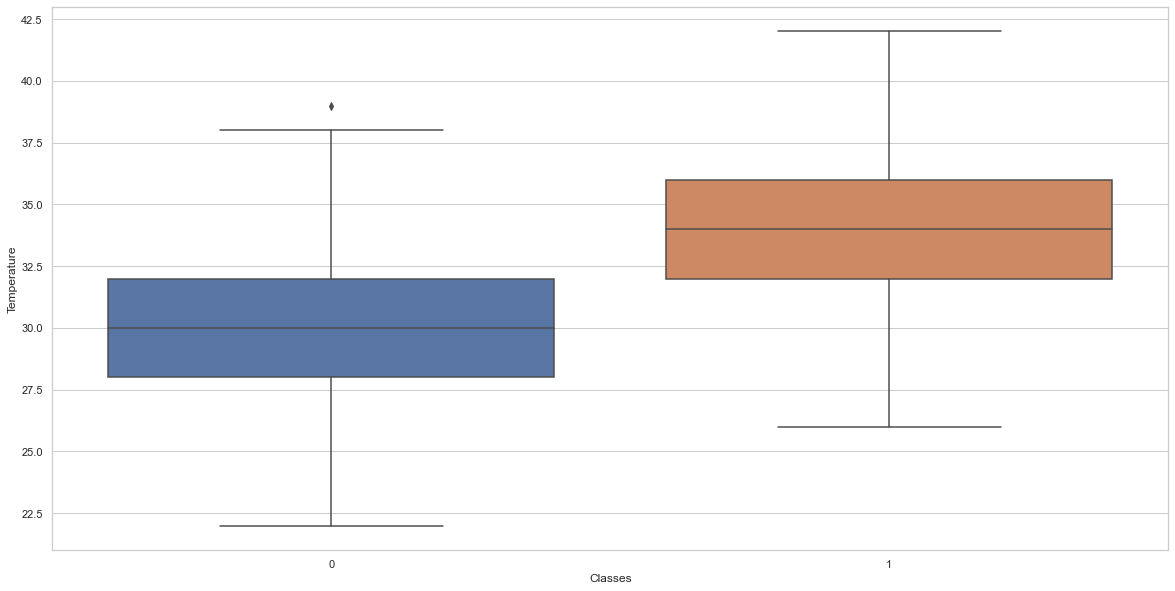

In [74]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='Classes', y ='Temperature', data = df)


**Observations:-**
* One day at lower temperature fires occur

### Boxplot of Classes Vs Rain

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

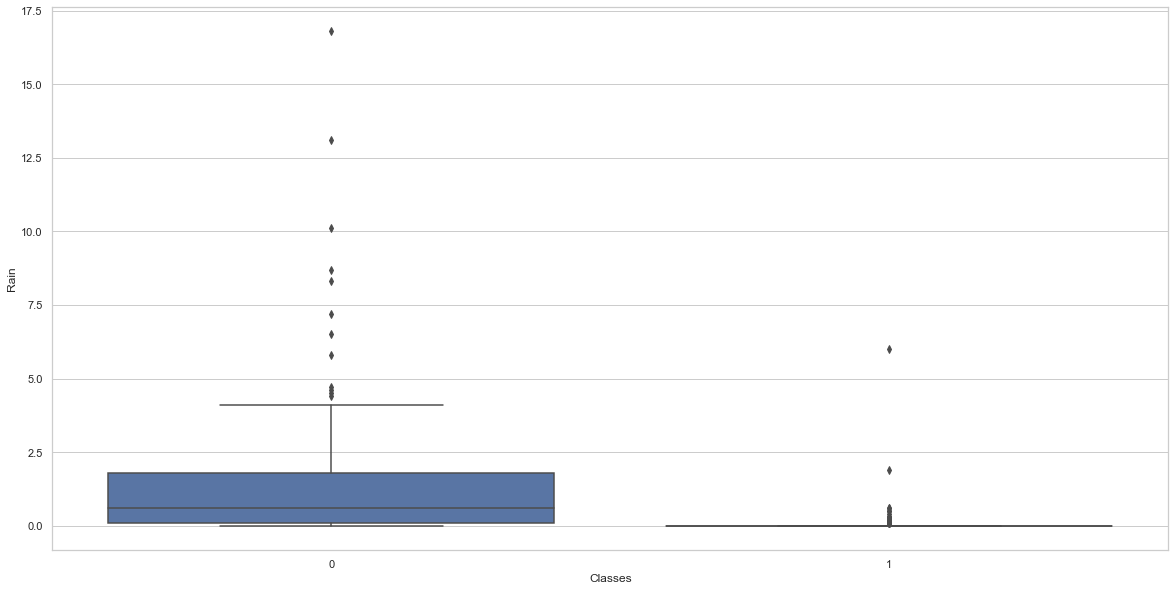

In [75]:
# Python program to illustrate
# boxplot using inbuilt data-set
# given in seaborn

# importing the required module
import seaborn

# use to set style of background of plot
seaborn.set(style="whitegrid")

# loading data-set

seaborn.boxplot(x ='Classes', y ='Rain', data = df)


**Observation:-**
* In many days after having rain also fire occur

# THANK YOU